In [ ]:
##MNIST에서 패션 데이터 가져와서 훈련 데이터와 평가 데이터 나누기
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0 ##(48000, 28, 28) -> (48000,28,28,1)변환
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2)) ##폴링 (2,2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
##(2,2)풀링을 했기 때문에 크기는 절반으로 줄어든다 -> 합성곱 층에서 32개의 필터를 사용 = 맵의 깊이 32
##최대 풀링을 통과한 특성 맵의 크기는 (14,14,32)
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4)) ##드롭아웃 추가
model.add(keras.layers.Dense(10, activation='softmax'))## 클래스 10개를 분류하는 다중 분류 문제이기에 softmax 사용

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

모델 파라미터의 개수

첫 번째 합성곱 층은 32개의 필터, 크기 (3,3) 깊이 1, 필터마다 하나의 절편 존재

3 x 3 x 1 x 32 + 32 = 320개의 파라미터

두 번째 합성곱 층 64개 필터, 크기 (3,3) 깊이 32, 필터마다 하나 절편

3 x 3 x 32 x 64 + 64 = 18,496 파라미터

flatten 클래스 (7,7,64) 크기를 1차원으로 펼치면 (3136,) 크기의 배열이 된다.

이를 100개의 뉴련과 연결 하므로
3136 x 100 + 100 = 313,700개

마찬가지로 마지막 출력층의 모델의 개수는
1,010개 이다.

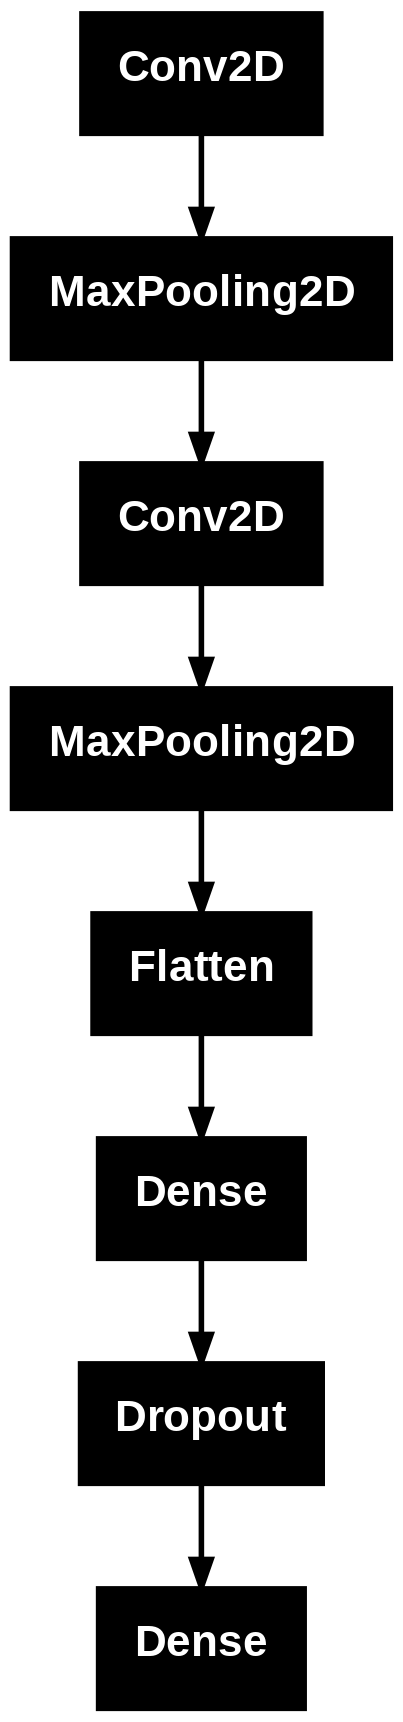

In [ ]:
keras.utils.plot_model(model)

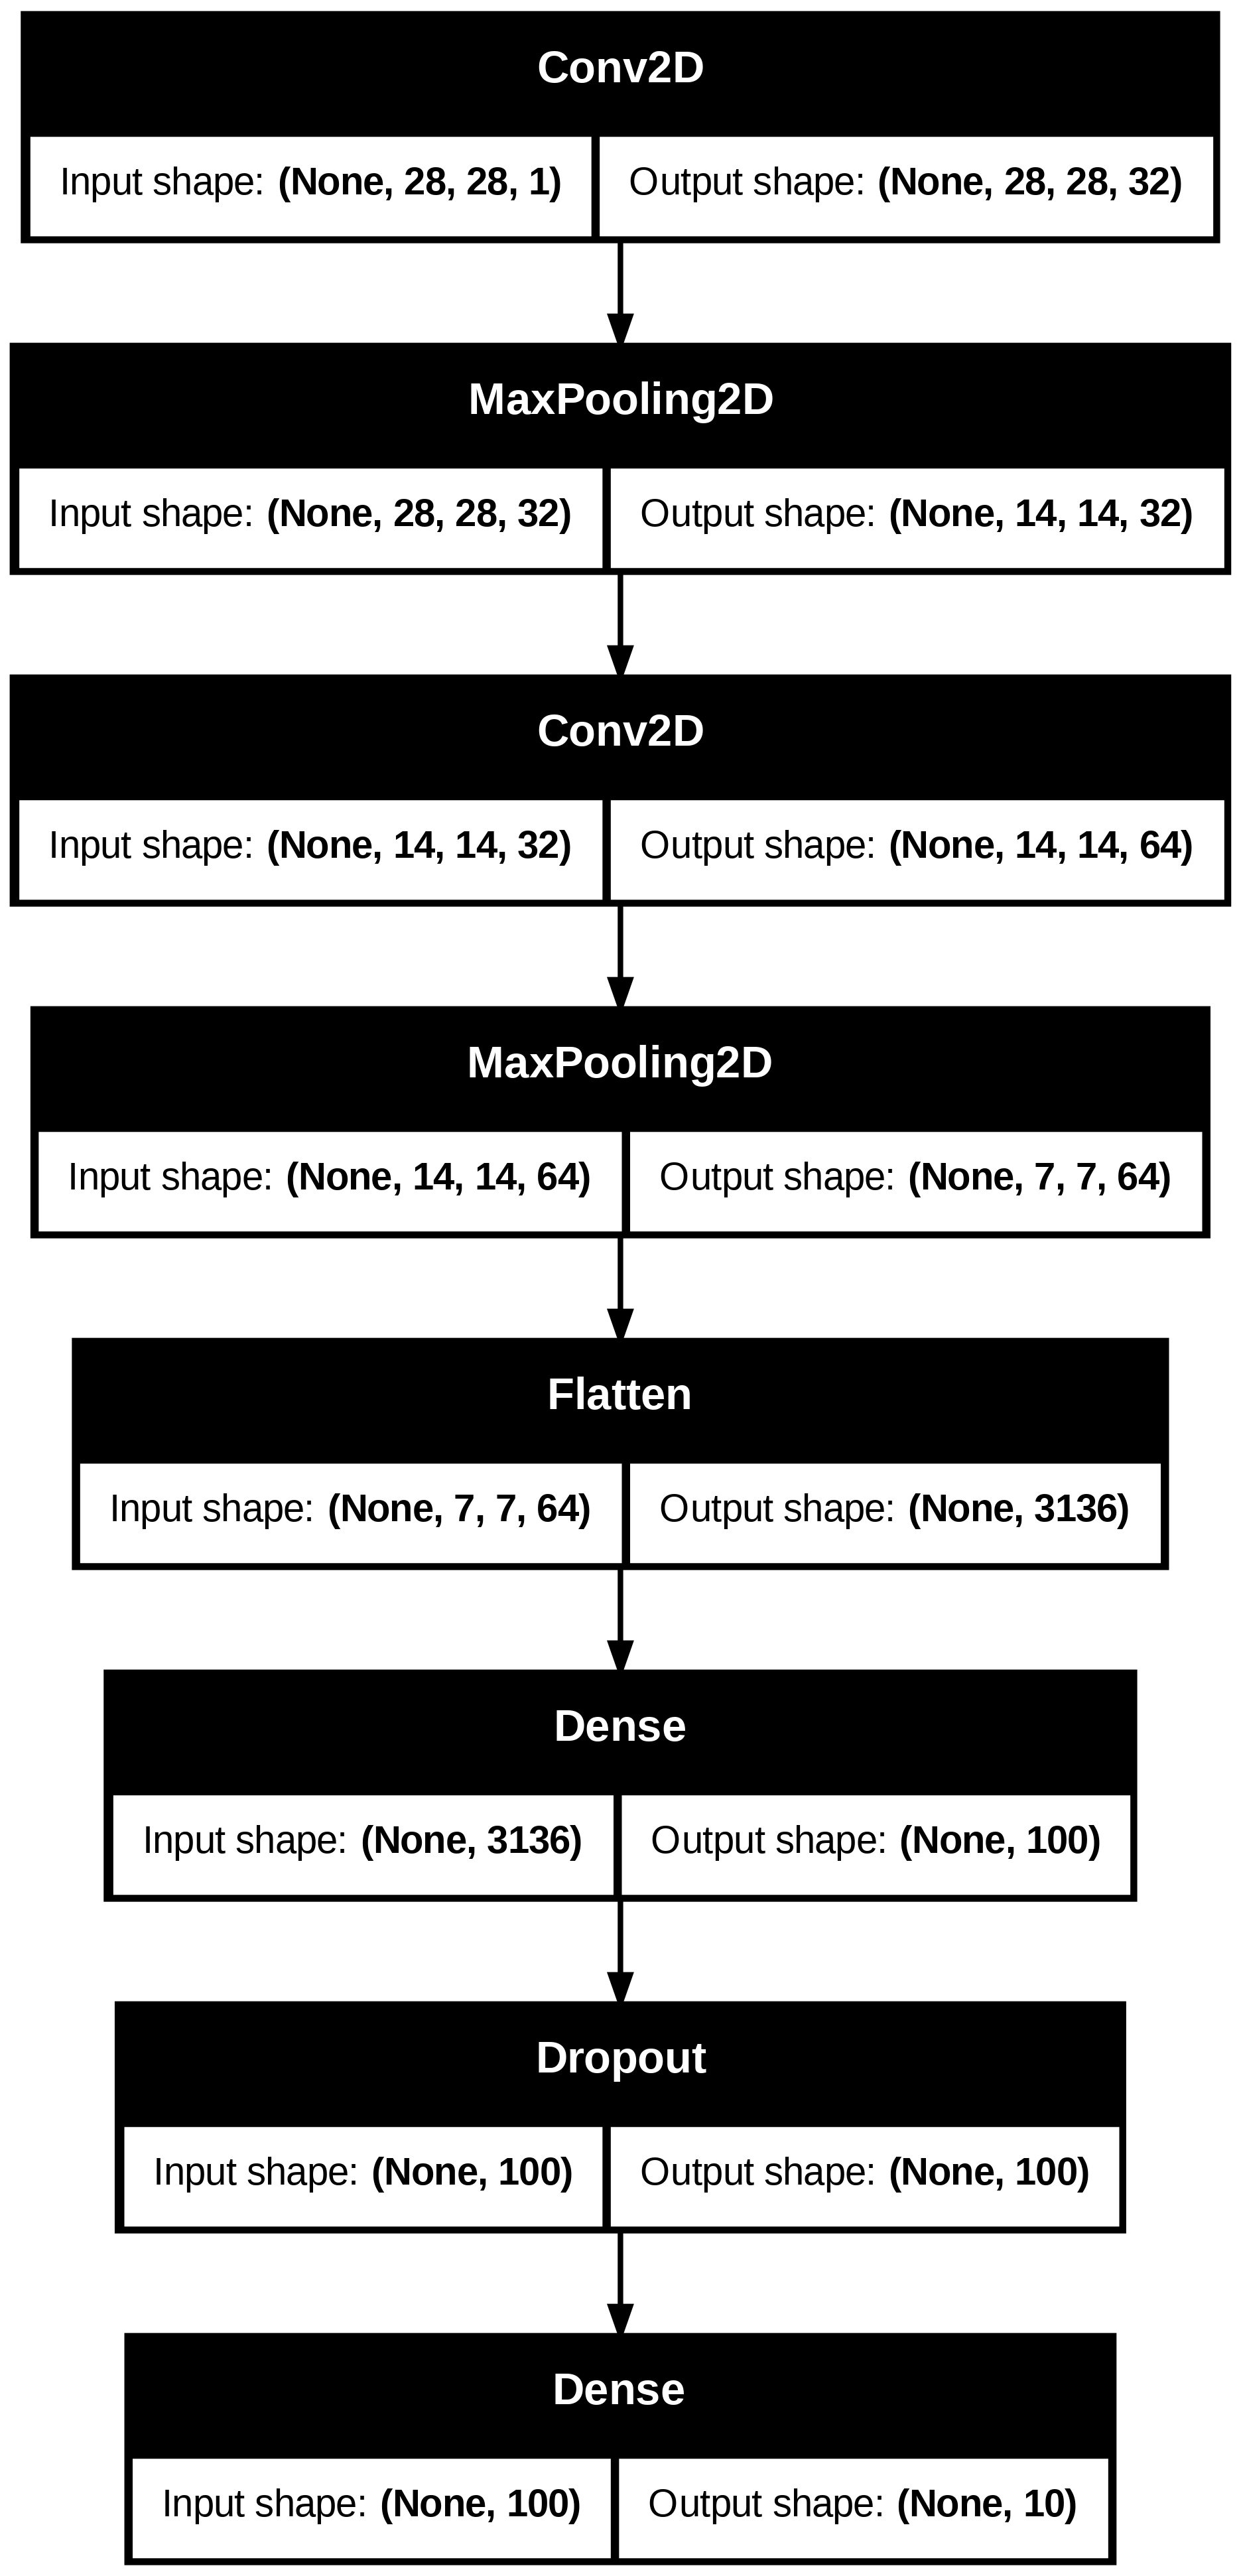

In [ ]:
keras.utils.plot_model(model, show_shapes=True,to_file = 'cnn-architecture.png',dpi = 300)

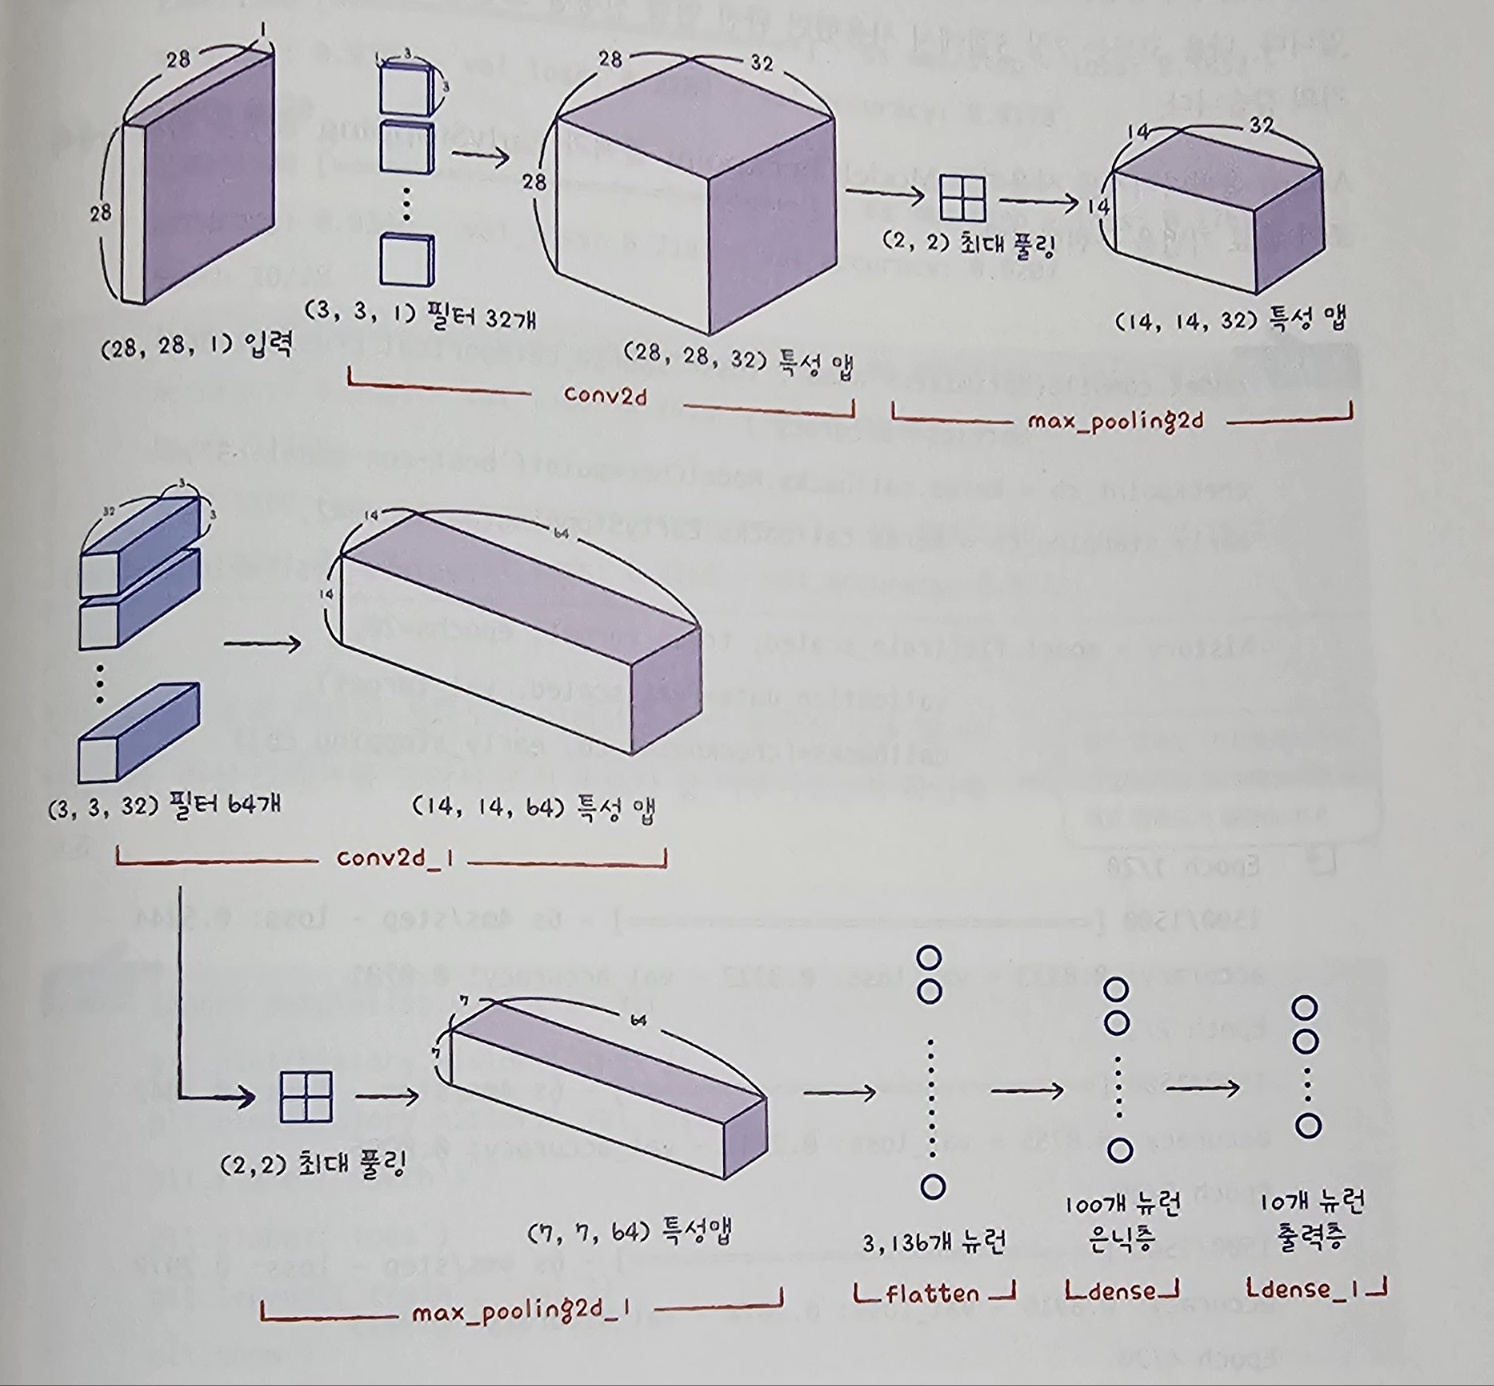



---
**모델  컴파일 및 훈련**


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-cnn-model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled,train_target, epochs = 20, validation_data = (val_scaled,val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.7378 - loss: 0.7328 - val_accuracy: 0.8786 - val_loss: 0.3258
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 136s 55ms/step - accuracy: 0.8712 - loss: 0.3549 - val_accuracy: 0.8944 - val_loss: 0.2810
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 136s 51ms/step - accuracy: 0.8932 - loss: 0.2980 - val_accuracy: 0.9072 - val_loss: 0.2520
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.9026 - loss: 0.2697 - val_accuracy: 0.9109 - val_loss: 0.2414
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 52ms/step - accuracy: 0.9111 - loss: 0.2420 - val_accuracy: 0.9099 - val_loss: 0.2442
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.9213 - loss: 0.2143 - val_accuracy: 0.9187 - val_loss: 0.2225
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.9273 - loss: 0.1975 - val_accuracy: 0.9208 - val_loss: 0.2180
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9310


*   adam optimizer 사용
*   checkpoint 콜백 + early stopping 콜백 사용



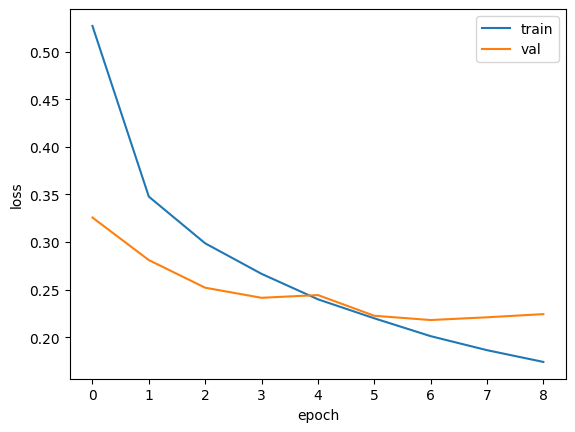

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9216 - loss: 0.2154


[0.21799515187740326, 0.9208333492279053]

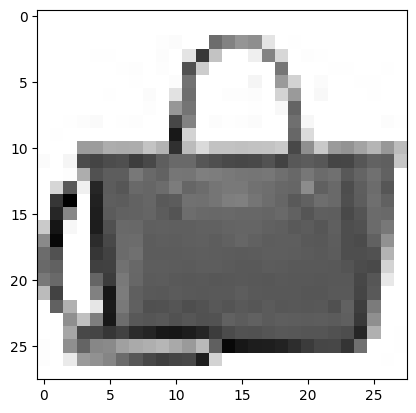

In [ ]:
plt.imshow(val_scaled[0].reshape(28,28),cmap = 'gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[[2.7334818e-13 4.1522648e-20 2.0562222e-16 4.4202381e-17 5.0334398e-16
  2.1562416e-17 4.9503777e-16 7.1485625e-15 1.0000000e+00 1.3846436e-16]]


아홉번째 값이 1이고 나머지는 0에 가까운 값이다.

e는 지수 표현

5e3 = 5 x 10 ^ 3

5e-3 = 5 x 10 ^ -3

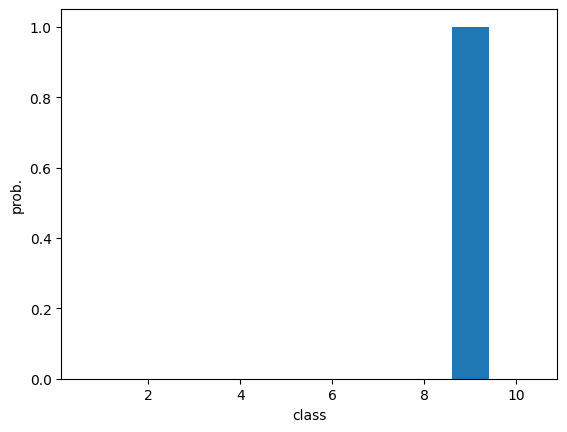

In [ ]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [ ]:
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9186 - loss: 0.2467


[0.2379373461008072, 0.9185000061988831]

# **가중치 시각화**
합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습함.

각 필터는 커널이라 부르는 가중치(w)와 절편(b)을 가지고 있다.

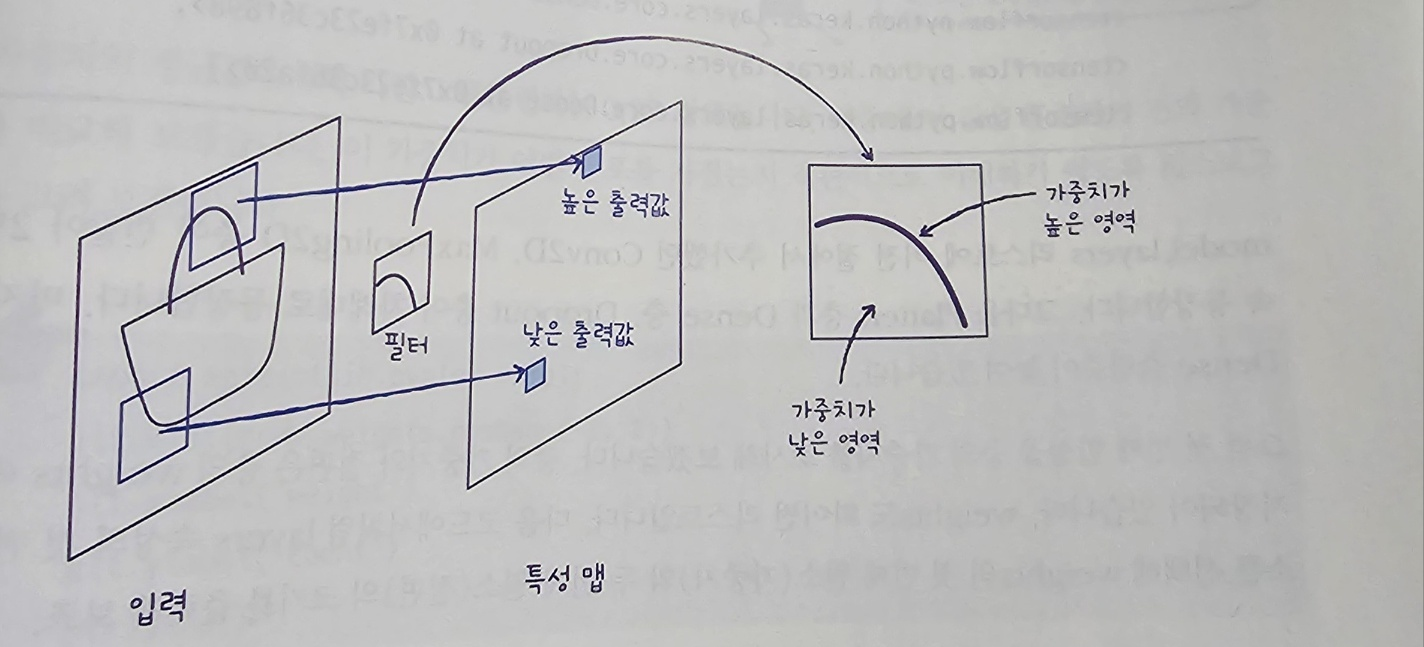

In [91]:
import tensorflow as tf

In [92]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras')

In [94]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

첫 번째 합성곱 층의 가중치를 살펴보면

layers 속성의첫 번째 원소를 선택해 weights 의 첫 번째 원소를 선택해 weights의 첫 번째 원소(가중치)와 두 번째 원소(절편)의 크기를 출력해본다.

In [95]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


이전에 커널 크기를 (3,3)으로 지정하였기에 실제 커널의 크기는 (3,3,1)이다.

필터의 개수가 32개이므로
weights의 첫 번째 원소인 가중치의 크기는 (3,3,1,32)이다.

그러면 weights의 두 번째 원소는 절편의 개수를 나타내기에 필터마다 1개의 절편이 있으므로 (32,)가 되는 것이다.



In [96]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std()) ##가중치 배열의 평균과 표준편차 출력

-0.036113065 0.28153652


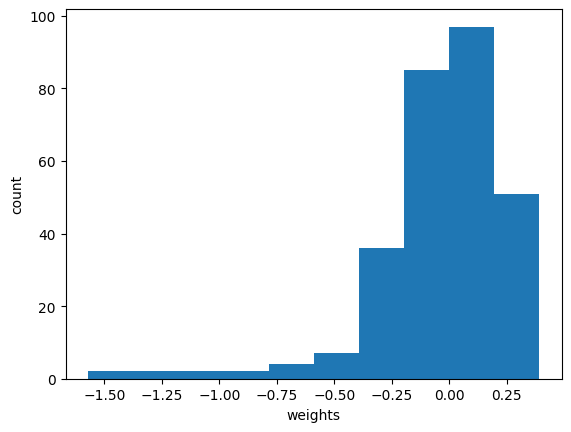

In [97]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel("weights")
plt.ylabel("count")
plt.show()

히스토그램을 보면 0을 중심으로 종모양 분포를 띠는 것을 알 수 있다.

32개의 커널을 출력해보겠다.

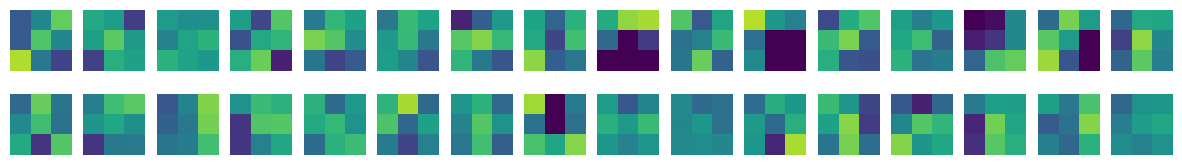

In [98]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

배열의 마지막 차원을 순회하면서 0부터 i*16 + j번째까지 가중치 값을 차례대로 출력한다.

i는 행 인덱스고 j는 열 인덱스로 각각 0~1, 0~15까지의 범위를 가진다.

따라서 conv_weights[:,:,:0,0]에서 conv_weights[:,:,:0,31]까지 출력한다.

*밝은 부분의 값이 높다

imshow() 함수는 배열의 있는 최댓값과 최솟값을 사용해 픽셀의 강도를 표현한다.

즉, 0.1이나 0.4나 어떤 값이든지 그 배열의 최댓값이면 가장 밝은 노란색으로 표현이 된다.

두 배열을 비교할 때는 어떤 절댓값으로 기준을 정해 픽셀의 강도를 나타내는 것이 좋은데 이를 코드로 vmin과 vmax로 설정한다.




---



이번엔 훈련하지 않은 빈 합성곱 신경망을 만들어 볼 것이다.

In [100]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [101]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)
##첫 번째 층의 가중치 저장

(3, 3, 1, 32)


In [102]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())
#가중치의 평균과 표준편차

-0.002854214 0.08255252


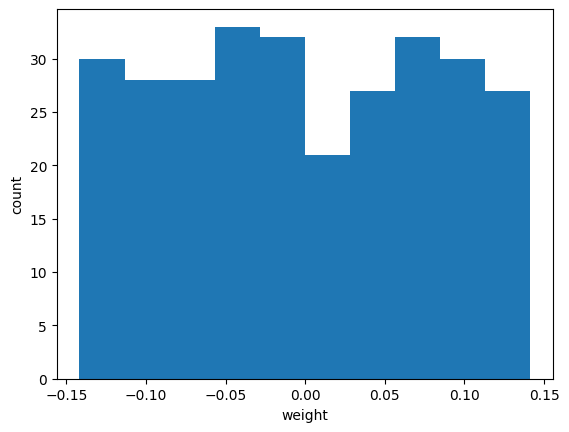

In [103]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

앞에서 보았던 히스토그램과 달리 학습을 진행하지 않은 신경망의 경우 가중치가 고른 분포를 보인다,

이는 텐서플로 신경망의 가중치가 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문이다.

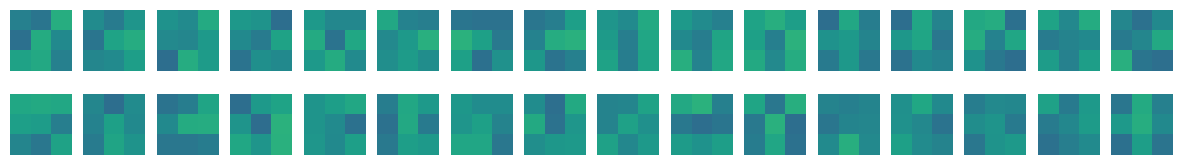

In [104]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

학습된 신경망과 달리 가중치가 밋밋하게 초기화되어있는 모습을 볼 수 있다,

따라서 합성곱 신경망이 패션 MNIST 데이터셋의 분류 정확도를 높이기 위해 유용한 패턴을 학습했다는 것을 알 수 있다.



---



# **함수형 API**

위에서는 신경망 모델을 만들 때 케라스 Sequential 클래스를 사용했다. 이 클래스는 층을 차례로 쌓은 모델을 만드는데 딥러닝에서는 입력이 2개이거나 출력이 2개인 등의 복잡한 모델이 많이 있다.

이러한 경우 함수형 API를 사용한다.

dense1 = keras.layers.Dense(100,activation = 'sigmoid')

dense2 = keras.layers.Dense(10,activation = 'softmax')

hidden = dense1(inputs)

이런식으로 은닉층을 추가할수도 있다.

outputs = dense2(hidden)

model = keras.Model(inputs,outputs)

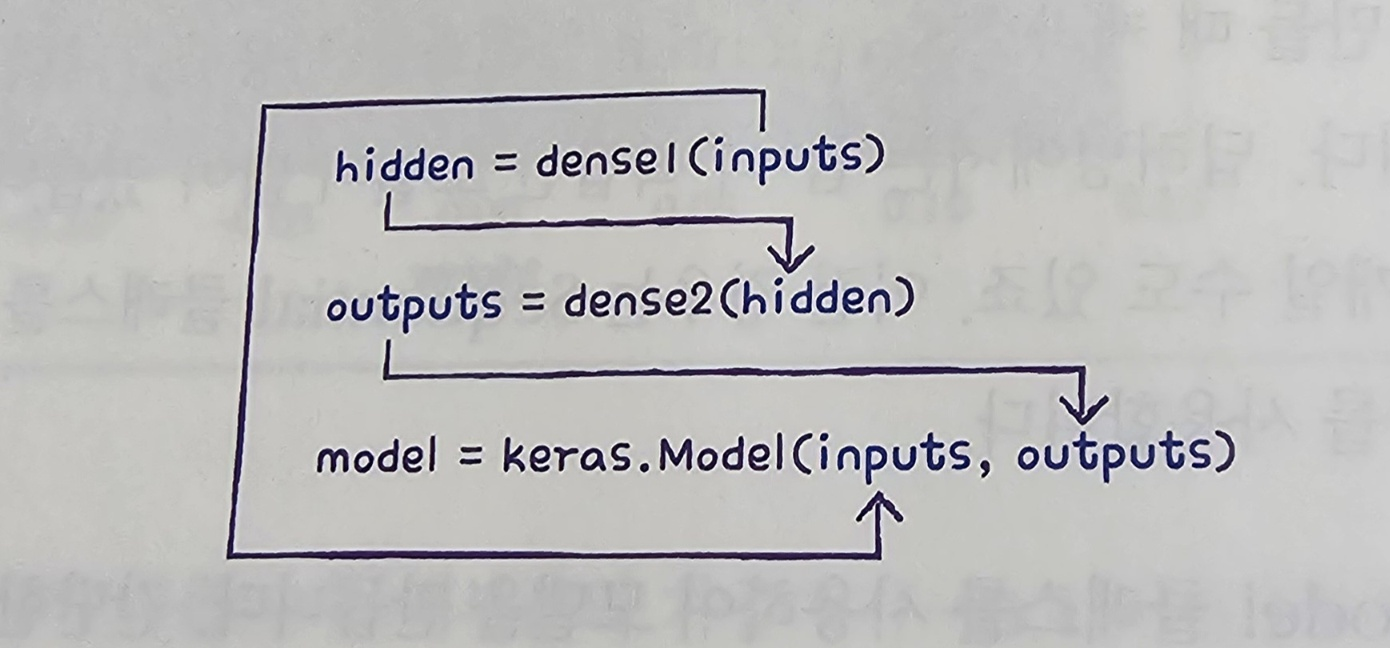

Input의 경우 직접 만들어서 호출해야한다.

inputs = keras.Input(shape=(784,))

따라서 전체를 보면



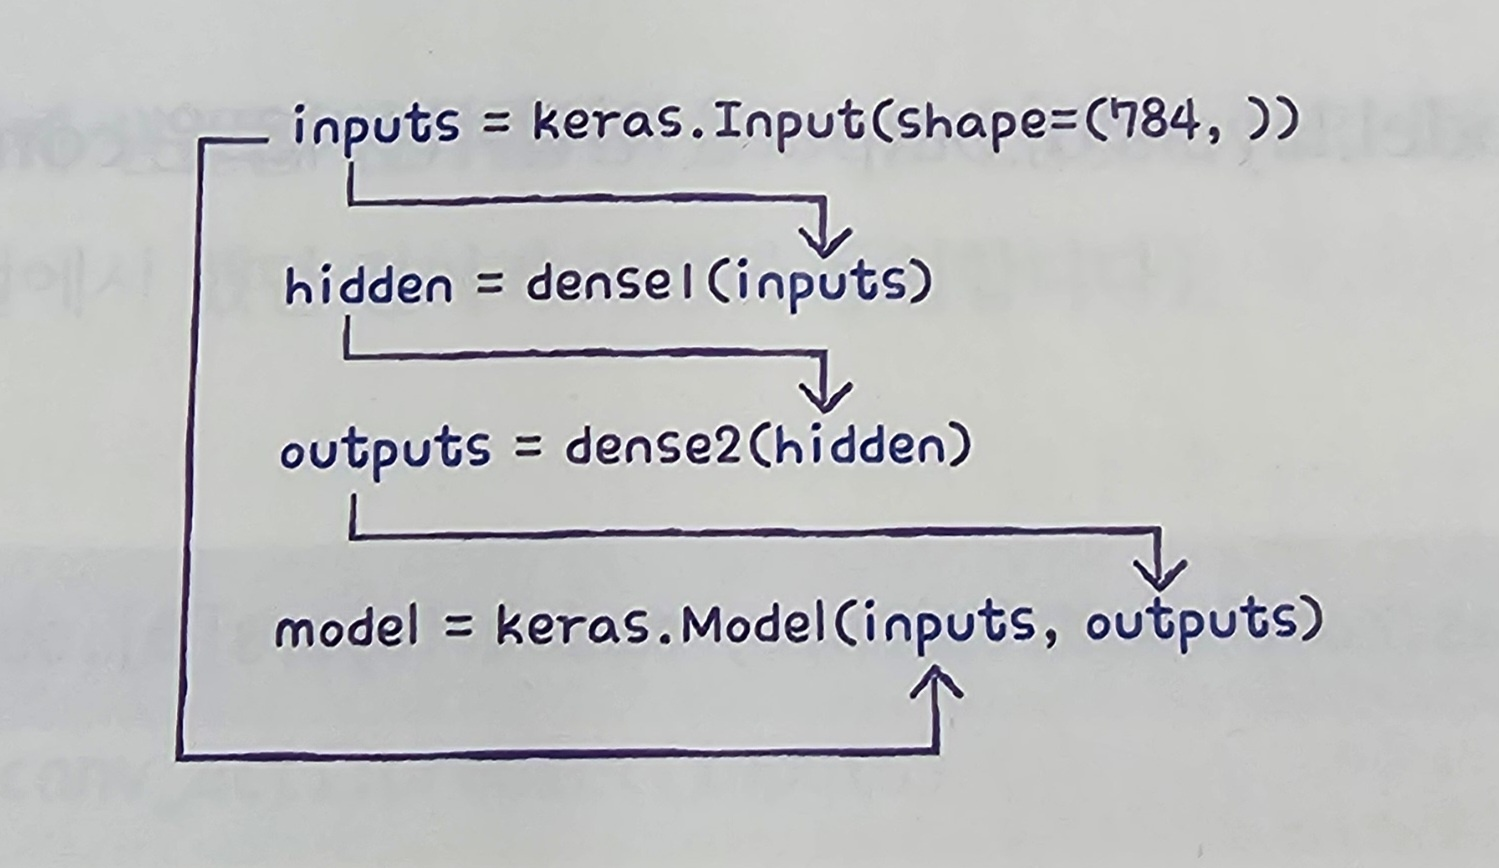

특성맵을 출력하는데 함수형 API가 필요한 이유는 Model 클래스에 입력과 출력을 지정하여 모델을 만들 수 있기 때문이다.

즉 Conv2D층의 출력을 알기 위해서 Model의 입력과 출력을 알면 새로운 모델을 만들 수 있다.

In [105]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [106]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)



---



# **특성 맵 시각화**

In [107]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

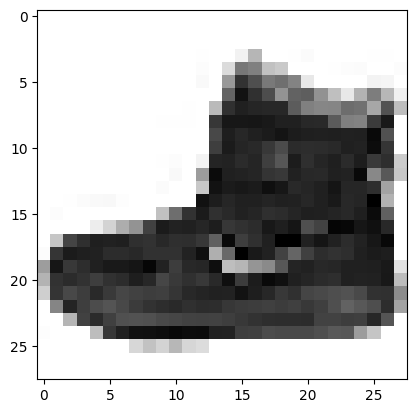

In [108]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

훈련세트의 첫 번째 샘플은 앵클 부츠이다,

그렇다면 이 샘플을 Con2D층이 만든느 특성맵을 출력해보겠다.

In [109]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [110]:
print(feature_maps.shape)

(1, 28, 28, 32)


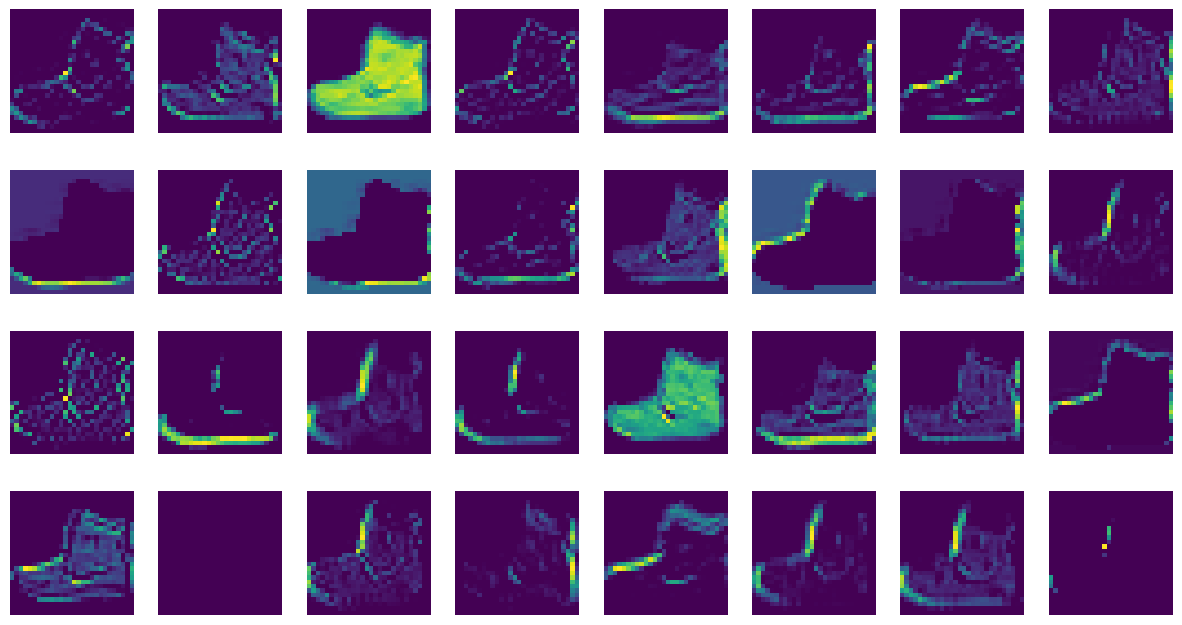

In [112]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
    axs[i, j].axis('off')

plt.show()

위 특성맵은 32개의 필터로 인해 입력 이미지에서 강하게 활성화 된 부분을 보여준다

In [113]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [114]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [115]:
print(feature_maps.shape)

(1, 14, 14, 64)


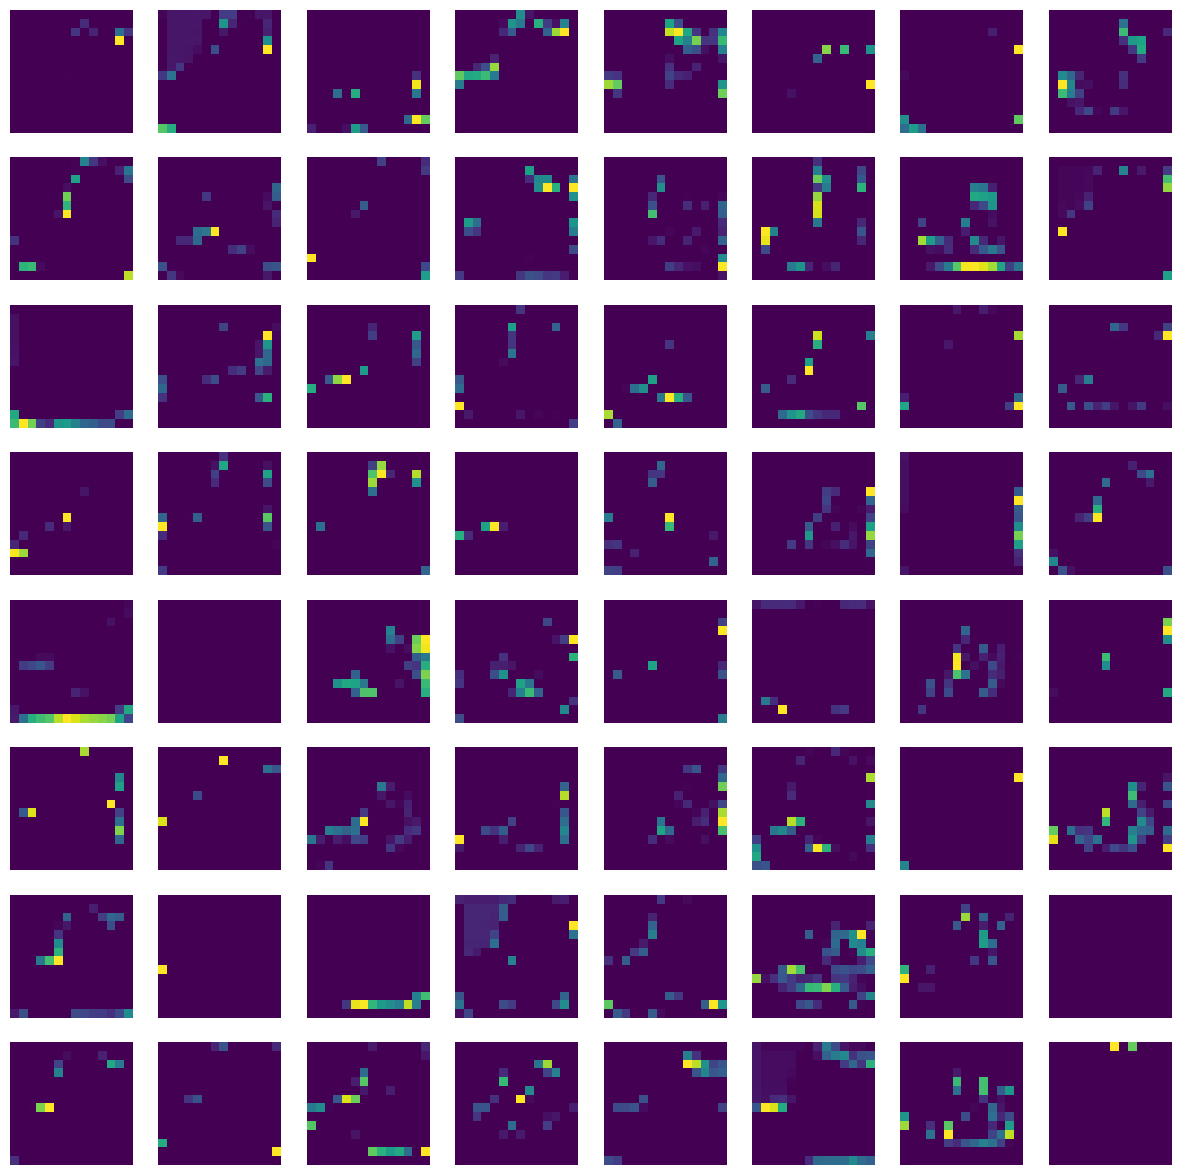

In [116]:
fig,axs = plt.subplots(8, 8, figsize=(15, 15))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
    axs[i, j].axis('off')

plt.show()

이 특성 맵은 시각적으로 이해하기 어렵다.

왜냐하면 합성곱 층의 필터 크기는 (3,3,32)이다.

두 번째 합성곱 층의 첫 필터가 앞서 출력한 32개의 맵과 곱해져 두 번째 합성곱 층의 첫 번째 맵이 되는데,

그렇게 계산된 출력은 (14,14,32)로 어느 부위를 감지하는지 긱관적으로 이해하기 어렵다.